# Logistic regression exercise with Titanic data

## Introduction

- Data from Kaggle's Titanic competition: [data](https://github.com/justmarkham/DAT8/blob/master/data/titanic.csv), [data dictionary](https://www.kaggle.com/c/titanic/data)
- **Goal**: Predict survival based on passenger characteristics
- `titanic.csv` is already in our repo, so there is no need to download the data from the Kaggle website

## Step 1: Read the data into Pandas

In [1]:
import pandas as pd
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/titanic.csv'
titanic = pd.read_csv(url, index_col='PassengerId')
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


## Step 2: Create X and y

Define **Pclass** and **Parch** as the features, and **Survived** as the response.

In [2]:
feature_cols = ['Pclass', 'Parch']
X = titanic[feature_cols]
y = titanic.Survived

## Step 3: Split the data into training and testing sets

In [3]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

## Step 4: Fit a logistic regression model and examine the coefficients

Confirm that the coefficients make intuitive sense.

In [4]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])

[('Pclass', -0.88188860564511296), ('Parch', 0.34239215857498861)]

## Step 5: Make predictions on the testing set and calculate the accuracy

In [5]:
# class predictions (not predicted probabilities)
y_pred_class = logreg.predict(X_test)

In [6]:
# calculate classification accuracy
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.668161434978


## Step 6: Compare your testing accuracy to the null accuracy

In [7]:
# this works regardless of the number of classes
y_test.value_counts().head(1) / len(y_test)

0    0.573991
dtype: float64

In [8]:
# this only works for binary classification problems coded as 0/1
max(y_test.mean(), 1 - y_test.mean())

0.5739910313901345

# Confusion matrix of Titanic predictions

In [9]:
# print confusion matrix
print metrics.confusion_matrix(y_test, y_pred_class)

[[105  23]
 [ 51  44]]


In [10]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
TP = confusion[1][1]
TN = confusion[0][0]
FP = confusion[0][1]
FN = confusion[1][0]

In [11]:
print 'True Positives:', TP
print 'True Negatives:', TN
print 'False Positives:', FP
print 'False Negatives:', FN

True Positives: 44
True Negatives: 105
False Positives: 23
False Negatives: 51


In [12]:
# calculate the sensitivity
print TP / float(TP + FN)
print 44 / float(44 + 51)

0.463157894737
0.463157894737


In [13]:
# calculate the specificity
print TN / float(TN + FP)
print 105 / float(105 + 23)

0.8203125
0.8203125


In [14]:
# store the predicted probabilities
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

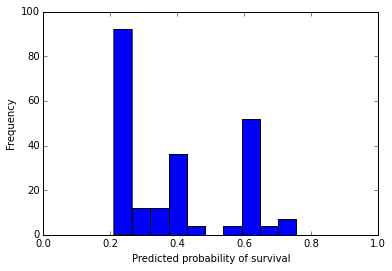

In [15]:
# histogram of predicted probabilities
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(y_pred_prob)
plt.xlim(0, 1)
plt.xlabel('Predicted probability of survival')
plt.ylabel('Frequency')

In [16]:
# increase sensitivity by lowering the threshold for predicting survival
import numpy as np
y_pred_class = np.where(y_pred_prob > 0.3, 1, 0)

In [17]:
# old confusion matrix
print confusion

[[105  23]
 [ 51  44]]


In [18]:
# new confusion matrix
print metrics.confusion_matrix(y_test, y_pred_class)

[[72 56]
 [32 63]]


In [19]:
# new sensitivity (higher than before)
print 63 / float(63 + 32)

0.663157894737


In [20]:
# new specificity (lower than before)
print 72 / float(72 + 56)

0.5625
